# 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화

# 1. 데이터 호출 및 정제 

## 1.1. 데이터 확인

In [2]:
metro_df = pd.read_csv('C:/Users/kongs/Desktop/서울시 지하철 승하차 인원 정보.csv',encoding = 'cp949')

In [3]:
metro_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,822,3,72,0,2,0,0,0,0,20210903
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,3747,15,390,0,0,0,0,0,0,20210903


In [4]:
# 데이터 프레임 정보 요약
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [5]:
# 데이터 확인하기
# 사용월
month = sorted(list(set(metro_df['사용월'])))
print(month)

[201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108]


## 1.2. 데이터 정제
### 2020년 이후의 데이터만 추출

In [6]:
# 2020년 이후의 데이터만 수집하여 코로나 이후 지하철 유동 인구를 분석
# 전체 46552개의 데이터 중 12049개 추출
metro_corona = metro_df[metro_df['사용월']> 202000]
metro_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12049 entries, 0 to 12048
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           12049 non-null  int64 
 1   호선명           12049 non-null  object
 2   지하철역          12049 non-null  object
 3   04시-05시 승차인원  12049 non-null  int64 
 4   04시-05시 하차인원  12049 non-null  int64 
 5   05시-06시 승차인원  12049 non-null  int64 
 6   05시-06시 하차인원  12049 non-null  int64 
 7   06시-07시 승차인원  12049 non-null  int64 
 8   06시-07시 하차인원  12049 non-null  int64 
 9   07시-08시 승차인원  12049 non-null  int64 
 10  07시-08시 하차인원  12049 non-null  int64 
 11  08시-09시 승차인원  12049 non-null  int64 
 12  08시-09시 하차인원  12049 non-null  int64 
 13  09시-10시 승차인원  12049 non-null  int64 
 14  09시-10시 하차인원  12049 non-null  int64 
 15  10시-11시 승차인원  12049 non-null  int64 
 16  10시-11시 하차인원  12049 non-null  int64 
 17  11시-12시 승차인원  12049 non-null  int64 
 18  11시-12시 하차인원  12049 non-null  int64 
 19  12시-

### 동작구 흑석역 주변 지하철역 데이터만 추출

In [7]:
# 모든 지하철명 출력
name = list(set(metro_df['지하철역']))
print(name)

['길동', '개봉', '구의', '굴포천', '신반포', '계양', '마들', '쌍용동', '청평', '화곡', '인천국제공항', '곤지암', '상계', '수서', '문래', '반월', '충정로(경기대입구)', '마포', '인하대', '동인천', '개화산', '월곡', '검암', '신답', '녹양', '신목동', '대림(구로구청)', '구일', '원덕', '아산', '성균관대', '연신내', '지행', '암사', '충정로', '망포', '망원', '북한산우이', '중화', '고잔', '대성리', '대림', '오목천', '외대앞', '지평', '미금', '서정리', '도봉', '상월곡', '삼양사거리', '동암', '동작', '신대방', '노원', '천안', '금릉', '도곡', '화랑대', '상봉', '김유정', '문정', '둔촌동', '수리산', '영등포구청', '서빙고', '연수', '덕소', '쌍용(나사렛대)', '세류', '강변(동서울터미널)', '국회의사당', '숭실대입구(살피재)', '독산', '잠실(송파구청)', '지축', '시청', '신원', '정발산', '가좌', '동대문역사문화공원(DDP)', '거여', '호구포', '경복궁(정부서울청사)', '봉화산(서울의료원)', '삼송', '임진강', '모란', '신이문', '오목교(목동운동장앞)', '신사', '신정(은행정)', '용마산(용마폭포공원)', '방배', '가락시장', '등촌', '과천', '증산', '삼각지', '안암(고대병원앞)', '남한산성입구(성남법원.검찰청)', '세마', '판교', '영종', '영통', '대야미', '양천향교', '녹천', '부개', '동대문', '청명', '도봉산', '미사', '고색', '양정', '용답', '우장산', '상천', '왕십리(성동구청)', '송탄', '굽은다리(강동구민회관앞)', '낙성대', '명학', '능곡', '야목', '홍대입구', '쌍문', '한성대입구(삼선교)', '오류동', '신용산', '이촌', '월롱', '대방', '월드컵경기장',

In [8]:
dj = ['흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' ]

In [9]:
metro_dj = metro_corona[metro_corona['지하철역'].isin(dj)].reset_index(drop=True)

In [10]:
metro_dj['지하철역'].value_counts()

동작(현충원)       40
노량진           40
숭실대입구(살피재)    20
상도            20
총신대입구(이수)     20
장승배기          20
흑석(중앙대입구)     20
신대방삼거리        20
노들            20
Name: 지하철역, dtype: int64

### 불필요한 데이터 삭제 : 작업일자

In [11]:
metro_dj = metro_dj.drop(columns=['작업일자'])

In [12]:
metro_dj.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,4호선,동작(현충원),12,0,407,444,1343,2942,3284,...,397,740,2,140,0,0,0,0,0,0
1,202108,4호선,총신대입구(이수),92,3,6012,918,14428,8186,38124,...,1399,5679,1,45,0,0,0,0,0,0
2,202108,7호선,상도,0,0,4563,1071,9638,3985,27182,...,1328,4705,17,408,0,0,0,0,0,0


### 호선 합치기

In [13]:
metro_line = metro_dj.groupby(['지하철역','사용월']).sum().reset_index()
metro_line

,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,노들,202001,21,0,3311,207,4975,1185,15174,2103,...,893,4770,186,1346,3,7,0,0,0,0
1,노들,202002,9,0,3045,219,4405,1175,14406,1953,...,732,3758,159,1077,0,0,0,0,0,0
2,노들,202003,10,0,2736,196,4022,1154,12379,1621,...,556,2809,127,875,0,0,0,0,0,0
3,노들,202004,14,0,2808,234,4091,1244,12854,1775,...,559,3453,0,40,0,0,0,0,0,0
4,노들,202005,15,1,2985,222,4366,1407,13536,1962,...,748,3943,0,48,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),202104,2,0,3105,1170,5851,6290,16257,10371,...,1498,4705,0,16,0,0,0,0,0,0
176,흑석(중앙대입구),202105,1,0,3182,1110,5728,5996,14270,9770,...,1777,4969,0,14,0,0,0,0,0,0
177,흑석(중앙대입구),202106,4,1,3350,1160,6188,6530,16225,11171,...,1635,4876,0,7,0,0,0,0,0,0
178,흑석(중앙대입구),202107,2,1,3187,1207,5557,6559,14454,10671,...,1133,3322,0,6,0,0,0,0,0,0


### 승,하차 인원 합치기 (승차 + 하차 = 유동인구)


In [14]:
columns = metro_line.columns.tolist()
columns = columns[2:]
print(columns)

['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원']


In [15]:
times = []
for i in columns:
    i = i.strip('승차인원')
    i = i.strip('하차인원')
    times.append(i)


# 중복 제거
time = []
for v in times :
    if v not in time :
        time.append(v)
print(time)

['04시-05시 ', '05시-06시 ', '06시-07시 ', '07시-08시 ', '08시-09시 ', '09시-10시 ', '10시-11시 ', '11시-12시 ', '12시-13시 ', '13시-14시 ', '14시-15시 ', '15시-16시 ', '16시-17시 ', '17시-18시 ', '18시-19시 ', '19시-20시 ', '20시-21시 ', '21시-22시 ', '22시-23시 ', '23시-24시 ', '00시-01시 ', '01시-02시 ', '02시-03시 ', '03시-04시 ']


In [17]:
metro_total = pd.DataFrame()
metro_total['지하철역'] = metro_line['지하철역']
metro_total['사용월'] = metro_line['사용월']

for i in range(len(time)) :
    metro_total[time[i]] = metro_line[columns[2*i]] + metro_line[columns[2*i+1]]

metro_total

,지하철역,사용월,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,노들,202001,21,3518,6160,17277,24454,15711,12781,10759,...,21842,16719,10932,10406,9370,5663,1532,10,0,0
1,노들,202002,9,3264,5580,16359,22898,13514,9964,8186,...,19122,14919,8865,8589,7474,4490,1236,0,0,0
2,노들,202003,10,2932,5176,14000,18468,10855,7112,6220,...,17209,13103,7641,6950,5651,3365,1002,0,0,0
3,노들,202004,14,3042,5335,14629,19122,11298,7763,7169,...,17597,13265,8264,7600,6346,4012,40,0,0,0
4,노들,202005,16,3207,5773,15498,20747,12713,9824,8586,...,19405,14126,9146,8791,7541,4691,48,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,흑석(중앙대입구),202104,2,4275,12141,26628,35573,24367,19979,18071,...,40200,25745,18172,16822,18632,6203,16,0,0,0
176,흑석(중앙대입구),202105,1,4292,11724,24040,32558,23329,19666,18468,...,38269,24719,18646,17511,20084,6746,14,0,0,0
177,흑석(중앙대입구),202106,5,4510,12718,27396,35988,24464,20730,18456,...,39737,24797,18270,16693,19085,6511,7,0,0,0
178,흑석(중앙대입구),202107,3,4394,12116,25125,32843,23263,18385,16913,...,35413,22043,15821,13630,14057,4455,6,0,0,0


### 가게 영업 시간대(13시 ~ 18시)의 데이터만 추출

In [18]:
metro_YS = metro_total[['지하철역','사용월',
 '13시-14시 ',
 '14시-15시 ',
 '15시-16시 ',
 '16시-17시 ',
 '17시-18시 ',
 '18시-19시 ',
 '19시-20시 ']]

In [19]:
# 정제 완료된 데이터 : metro_YS
# 2020년 1월 ~ 2021년 8월까지의 동작구 지하철역(9개) 유동인구 데이터
# '흑석(중앙대입구)','상도','숭실대입구(살피재)','동작(현충원)','총신대입구(이수)','노들','노량진','장승배기','신대방삼거리' 
metro_YS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지하철역      180 non-null    object
 1   사용월       180 non-null    int64 
 2   13시-14시   180 non-null    int64 
 3   14시-15시   180 non-null    int64 
 4   15시-16시   180 non-null    int64 
 5   16시-17시   180 non-null    int64 
 6   17시-18시   180 non-null    int64 
 7   18시-19시   180 non-null    int64 
 8   19시-20시   180 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.8+ KB


# 2. 데이터 분석

In [20]:
metro_YS.head(20)

,지하철역,사용월,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,202001,13201,12021,13710,13895,16307,21842,16719
1,노들,202002,9936,8927,10152,10181,13269,19122,14919
2,노들,202003,7776,7065,8222,8487,11334,17209,13103
3,노들,202004,8463,7965,8959,9509,12122,17597,13265
4,노들,202005,10160,9520,10513,11263,13698,19405,14126
5,노들,202006,9979,8659,10592,11374,14186,21283,15437
6,노들,202007,10566,9767,11313,12661,15761,22787,16376
7,노들,202008,9466,8573,10177,10607,13938,19742,14355
8,노들,202009,8640,8504,9843,10224,13229,18871,13453
9,노들,202010,10717,9951,11411,12163,15097,20269,14600


## 2.1. 시간대별 평균 유동인구

In [24]:
metro_mean = metro_YS.groupby(['지하철역']).mean().reset_index() # 지하철역 마다 평균 계산
metro_mean = metro_mean.drop(columns='사용월') # 사용월 칼럼 삭제

df_metro_mean = pd.DataFrame(metro_mean)
df_metro_mean

,지하철역,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시
0,노들,9864.00,9203.50,10465.00,11202.65,13883.05,19946.20,14412.30
1,노량진,87541.45,76192.15,81588.80,93261.20,128895.20,183533.00,115333.75
2,동작(현충원),11189.30,11695.45,12546.85,13766.75,16246.20,20853.80,12752.85
3,상도,23271.85,22577.20,24188.50,28915.80,36350.60,50147.45,34918.10
4,숭실대입구(살피재),27687.90,26659.35,28656.75,33882.50,43711.85,58398.85,43171.95
5,신대방삼거리,32925.35,32755.35,35663.55,41125.05,51855.55,83030.95,59736.95
6,장승배기,22620.80,22058.05,23835.85,26519.10,32270.65,46584.05,33664.10
7,총신대입구(이수),51234.95,52002.85,55802.75,63008.40,77693.55,109576.00,71461.05
8,흑석(중앙대입구),20692.20,19393.55,22190.65,25186.50,32494.50,37526.90,24768.40


## 2.2. 각 지하철역 별  시간대 유동인구 그래프 by matplotlib.pyplot

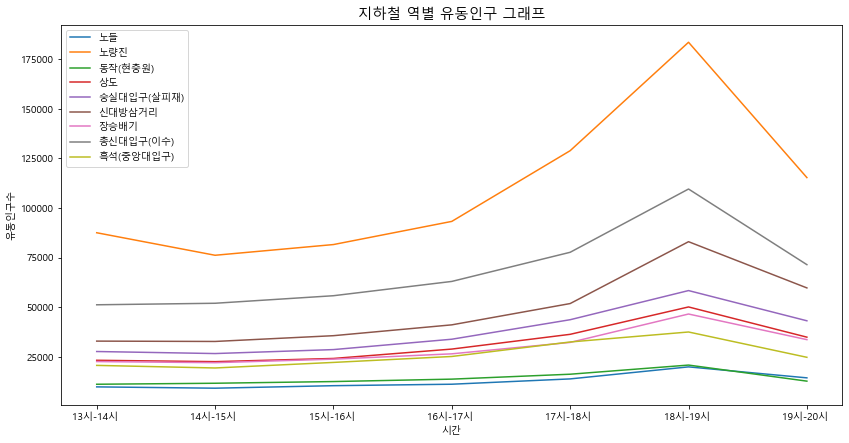

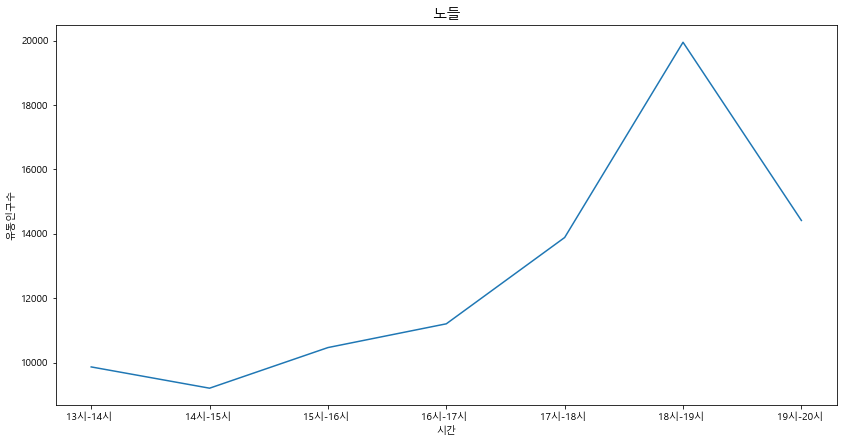

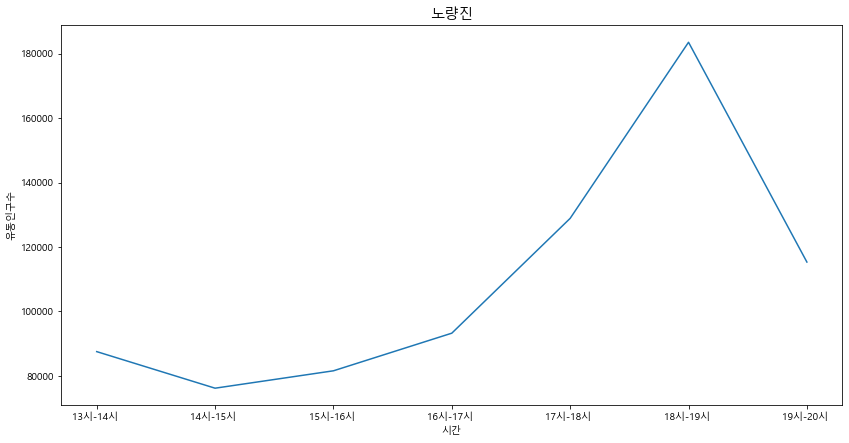

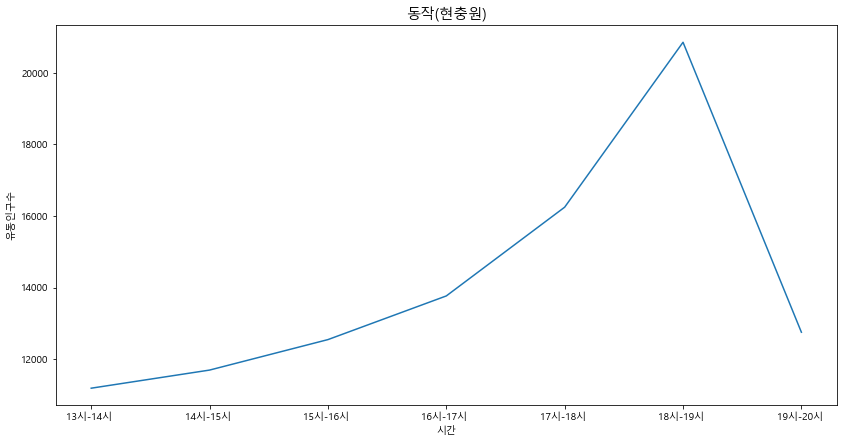

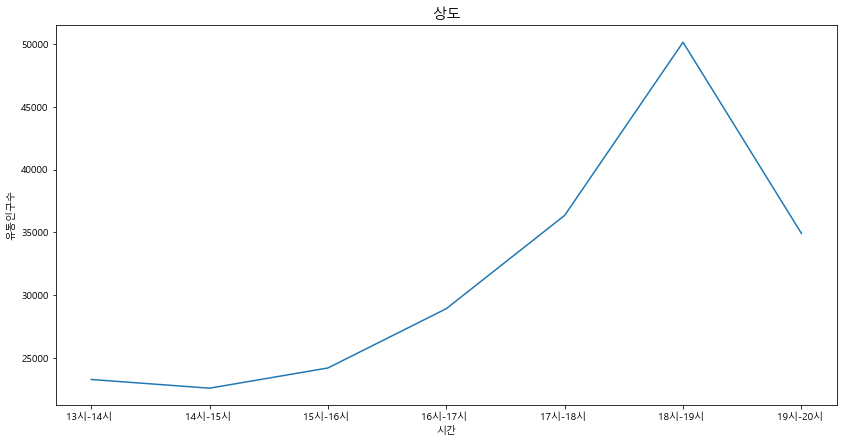

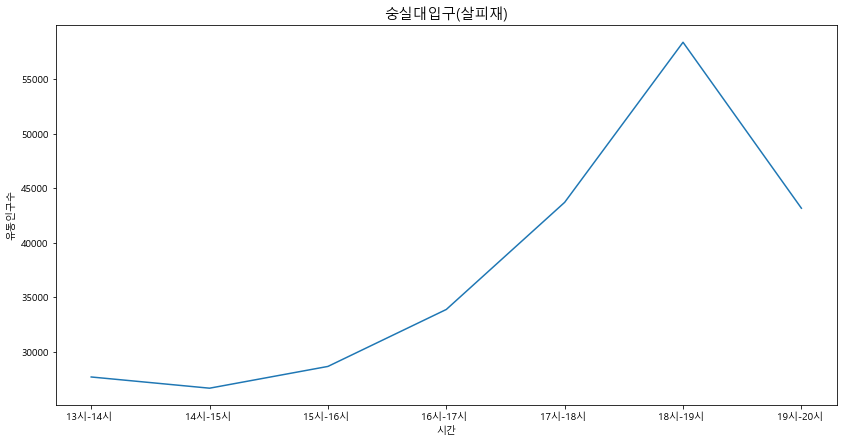

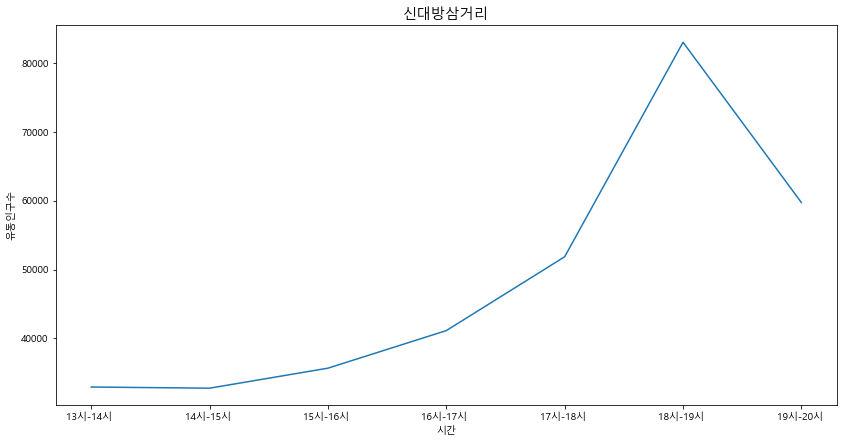

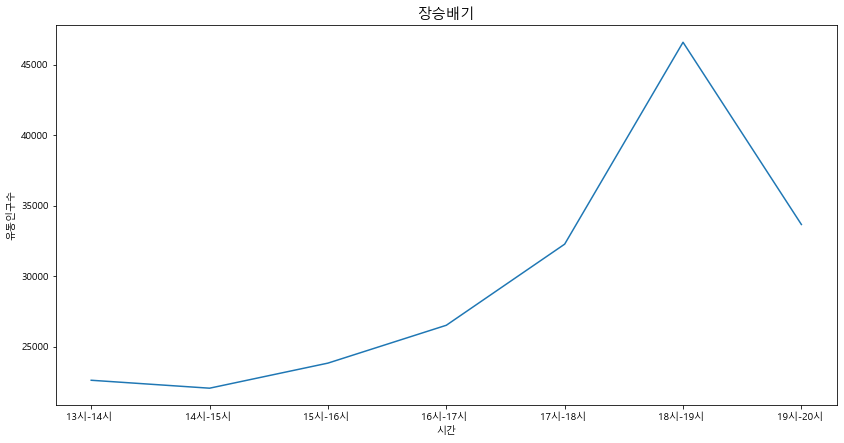

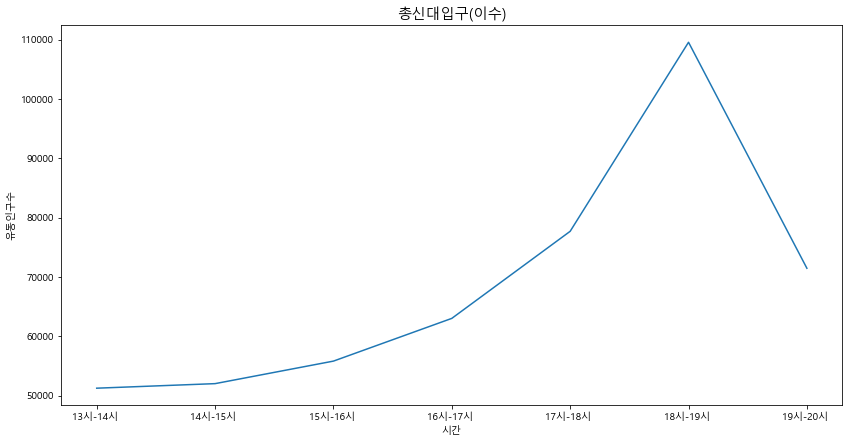

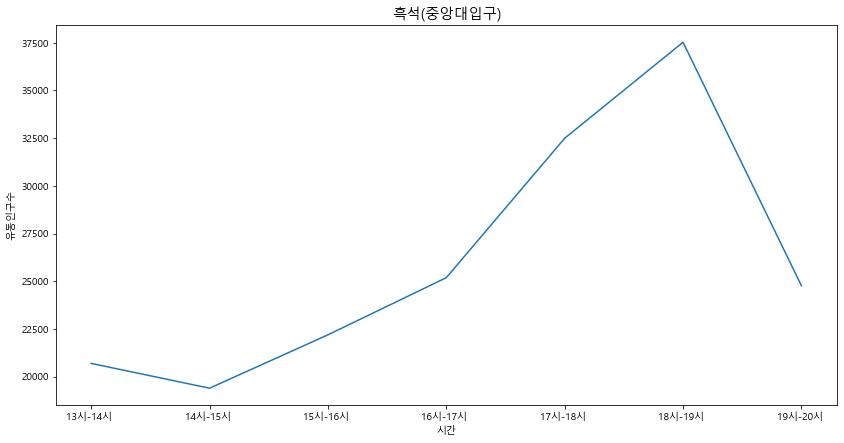

In [103]:
#1) 지하철 역별 그래프 그리기_merged_계속 figsize 바꾸면 다른 그래프로 출력됨.(for loop)
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/MALGUN.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(14, 7))
plt.xlabel('시간')
plt.ylabel('유동인구수')
plt.title('지하철 역별 유동인구 그래프', fontsize='x-large')

for i in range(len(df_metro_mean.index)):
    df_plot_merged = df_metro_mean.iloc[i, 1:]
    plt.plot(df_plot_merged, label = df_metro_mean['지하철역'][i])
    plt.legend(fontsize='medium')
    
#2) 지하철 역별 그래프_separated
for j in range(len(df_metro_mean.index)):
    df_plot_separated = df_metro_mean.iloc[j, 1:]
    plt.figure(figsize=(14, 7))
    plt.plot(df_plot_separated)
    plt.title(df_metro_mean['지하철역'][j], fontsize='x-large')
    plt.xlabel('시간')
    plt.ylabel('유동인구수')
    plt.show()